In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
# Optional: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

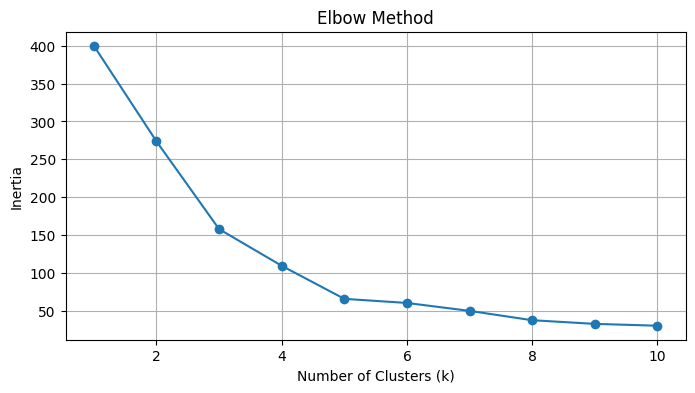

In [6]:
# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [7]:
# Apply K-Means with optimal k (e.g., 5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [8]:
# Add cluster label to original data
df['Cluster'] = clusters

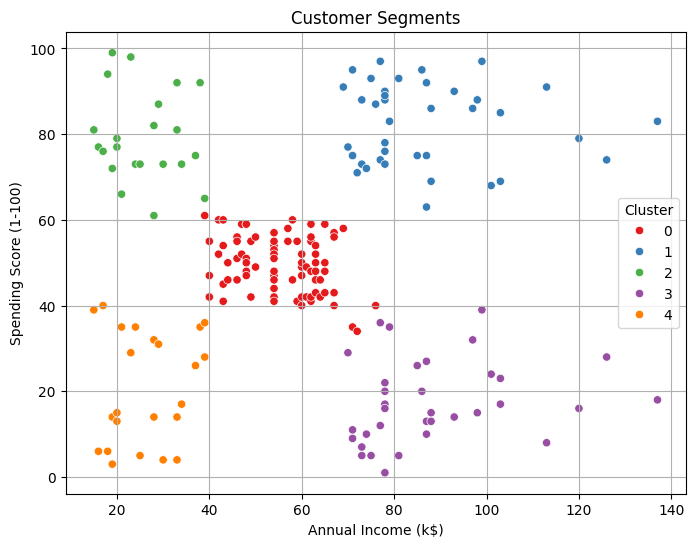

In [9]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

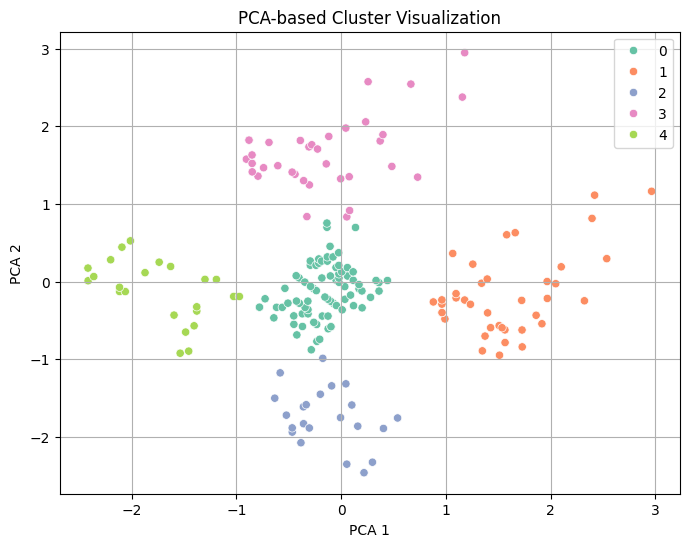

In [10]:
# Optional: PCA for 2D visualization if using more features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("PCA-based Cluster Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [11]:
# Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for k={k_optimal}: {score:.3f}")

Silhouette Score for k=5: 0.555
